In [14]:
# 1. Sprawdzenie czy dane nadają się do analizy skupień (klasteryzacji)

import pandas as pd
import numpy as np

file_path = "data.csv"
data = pd.read_csv(file_path)

def check_data_for_clustering(data):
    results = {}

    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist() # Kolumny numeryczne
    results['numeric_columns'] = numeric_cols

    missing_values = data.isnull().sum().sum() # Sprawdzenie brakujących wartości
    results['missing_values'] = missing_values

    non_numeric_cols = [col for col in data.columns if col not in numeric_cols] # Kolumny nienumeryczne (sprawdzanie unikalnych wartości)
    unique_values = {col: data[col].nunique() for col in non_numeric_cols}
    results['unique_values_in_non_numeric'] = unique_values

    ranges = {col: (data[col].min(), data[col].max()) for col in numeric_cols} # Zakresy numeryczne
    results['numeric_column_ranges'] = ranges

    results['num_observations'] = len(data) # Liczba obserwacji
    results['scaling_needed'] = True # Wymagana normalizacja

    return results

results = check_data_for_clustering(data)

# Wyświetanie wyników
for key, value in results.items():
    print(f"{key}: {value}")


numeric_columns: ['id', 'age', 'income', 'outcome', 'savings', 'children', 'credit_score', 'spending_score']
missing_values: 0
unique_values_in_non_numeric: {'name': 100, 'employment_status': 4, 'city': 13}
numeric_column_ranges: {'id': (1, 100), 'age': (18, 80), 'income': (2479.6, 28730.73), 'outcome': (508.03, 3410.55), 'savings': (42.28, 640217.0), 'children': (0, 5), 'credit_score': (320.18, 842.98), 'spending_score': (2.4, 99.74)}
num_observations: 100
scaling_needed: True


Silhouette score przed PCA: 0.12
Silhouette score po PCA: 0.26


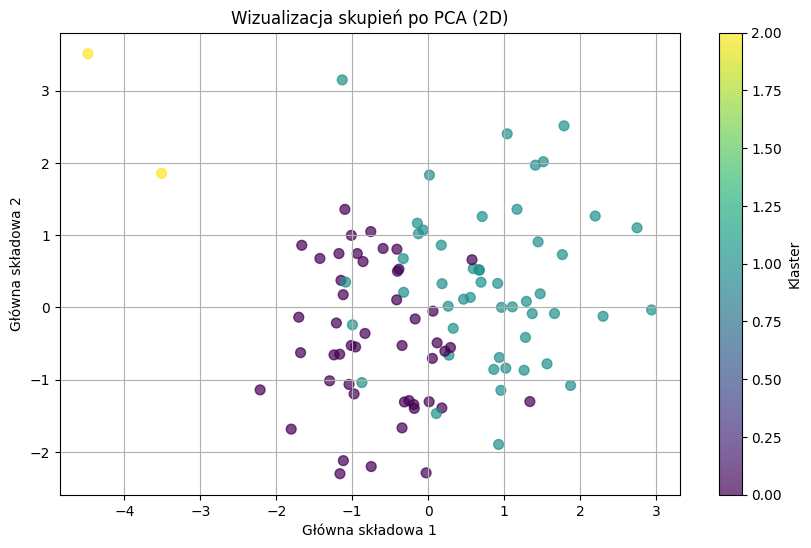

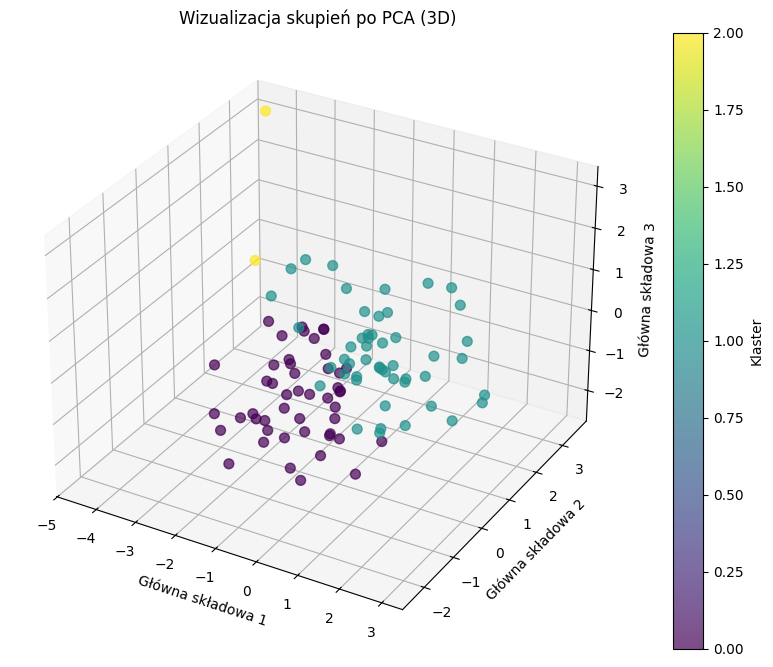

Porównanie klasteryzacji:
Liczba klastrów przed PCA: 3
Liczba klastrów po PCA: 3


In [15]:
# 2. Metoda PCA
# 2.1 Wykonaj analizę PCA na własnym zbiorze danych.
# 2.2 Wykonaj wizualizację skupień dla 2 lub 3 głównych składowych.
# 2.3 Porównaj wyniki klasteryzacji przed i po redukcji wymiarowości.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_numeric = data.select_dtypes(include=[np.number]) # Usunięcie kolumn nienumerycznych


pca = PCA(n_components=3)  # PCA Zredukujemy wymiarowość do 3 komponentów
data_pca = pca.fit_transform(data_scaled)

# Klasteryzacja k-means przed PCA
kmeans_before = KMeans(n_clusters=3, random_state=42)
labels_before = kmeans_before.fit_predict(data_scaled)

# Klasteryzacja k-means po PCA
kmeans_after = KMeans(n_clusters=3, random_state=42)
labels_after = kmeans_after.fit_predict(data_pca)

# Obliczenie współczynnika silhouette
silhouette_before = silhouette_score(data_scaled, labels_before)
silhouette_after = silhouette_score(data_pca, labels_after)

print(f"Silhouette score przed PCA: {silhouette_before:.2f}")
print(f"Silhouette score po PCA: {silhouette_after:.2f}")

# Wizualizacja wyników PCA w 2D
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_after, cmap='viridis', s=50, alpha=0.7)
plt.title("Wizualizacja skupień po PCA (2D)")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.colorbar(label="Klaster")
plt.grid()
plt.show()

# Wizualizacja wyników PCA w 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels_after, cmap='viridis', s=50, alpha=0.7)
ax.set_title("Wizualizacja skupień po PCA (3D)")
ax.set_xlabel("Główna składowa 1")
ax.set_ylabel("Główna składowa 2")
ax.set_zlabel("Główna składowa 3")
plt.colorbar(scatter, label="Klaster")
plt.show()

# Porównanie wyników klasteryzacji
print("Porównanie klasteryzacji:")
print(f"Liczba klastrów przed PCA: {len(set(labels_before))}")
print(f"Liczba klastrów po PCA: {len(set(labels_after))}")

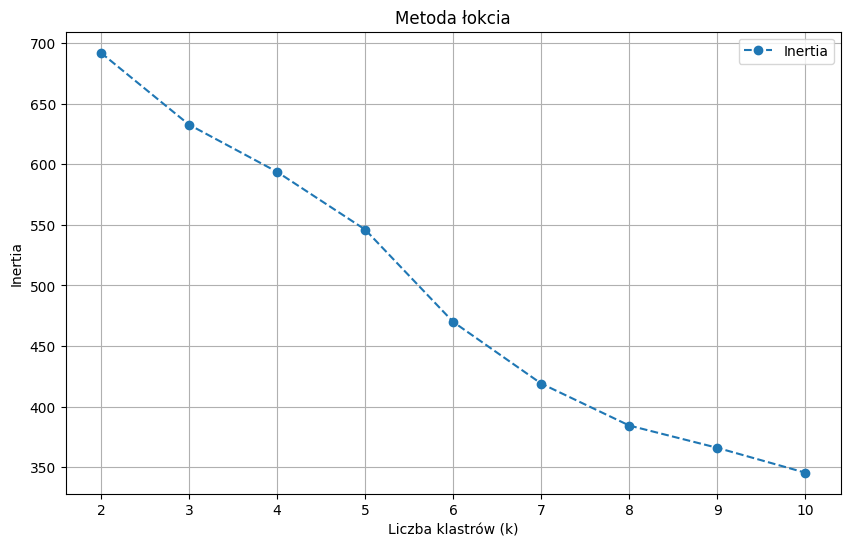

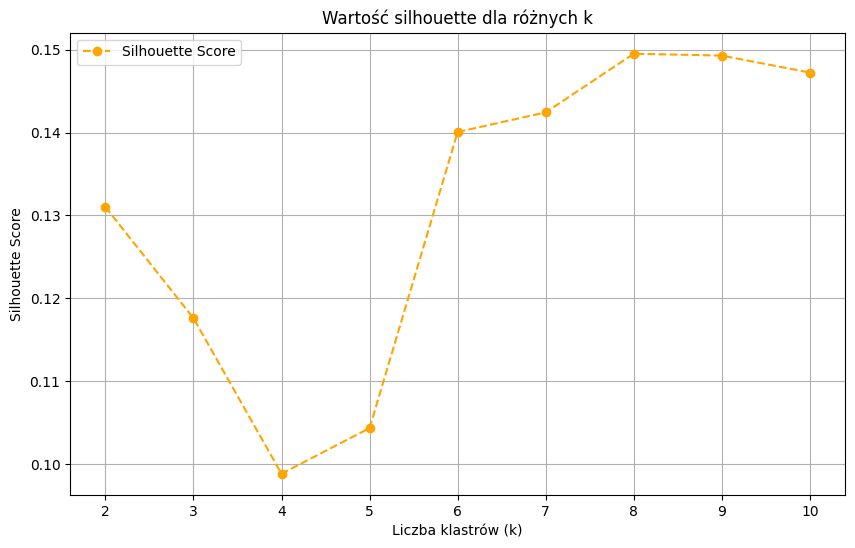

Silhouette Score dla optymalnego k=3: 0.12
Silhouette Score po PCA (k=3): 0.36


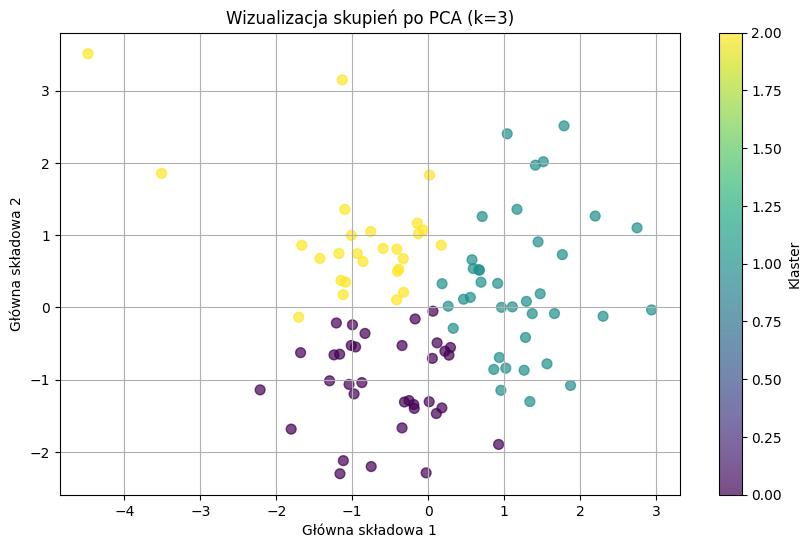

In [16]:
# 3.1 Klasteryzacja k-means dla różnych wartości k (metoda łokcia)
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Testujemy od 2 do 10 klastrów

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Wykres metody łokcia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.title("Metoda łokcia")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# Wykres współczynnika silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.title("Wartość silhouette dla różnych k")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# Wybór optymalnego k na podstawie metody łokcia (manualny wybór lub analiza wykresu)
optimal_k = 3  # Zakładamy, że wybraliśmy k=3 na podstawie wykresu

# 3.2 Klasteryzacja k-means dla optymalnego k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(data_scaled)

# Porównanie wyników z wcześniejszym PCA
print(f"Silhouette Score dla optymalnego k={optimal_k}: {silhouette_score(data_scaled, labels_optimal):.2f}")

pca = PCA(n_components=2) # Redukcja do 2 komponentów
data_pca = pca.fit_transform(data_scaled)

kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42) # Klasteryzacja po PCA
labels_pca = kmeans_pca.fit_predict(data_pca)

silhouette_pca = silhouette_score(data_pca, labels_pca) # Silhouette po PCA
print(f"Silhouette Score po PCA (k={optimal_k}): {silhouette_pca:.2f}")

# Wizualizacja klasteryzacji na zredukowanych wymiarach (2D)
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Wizualizacja skupień po PCA (k={optimal_k})")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.colorbar(label="Klaster")
plt.grid()
plt.show()


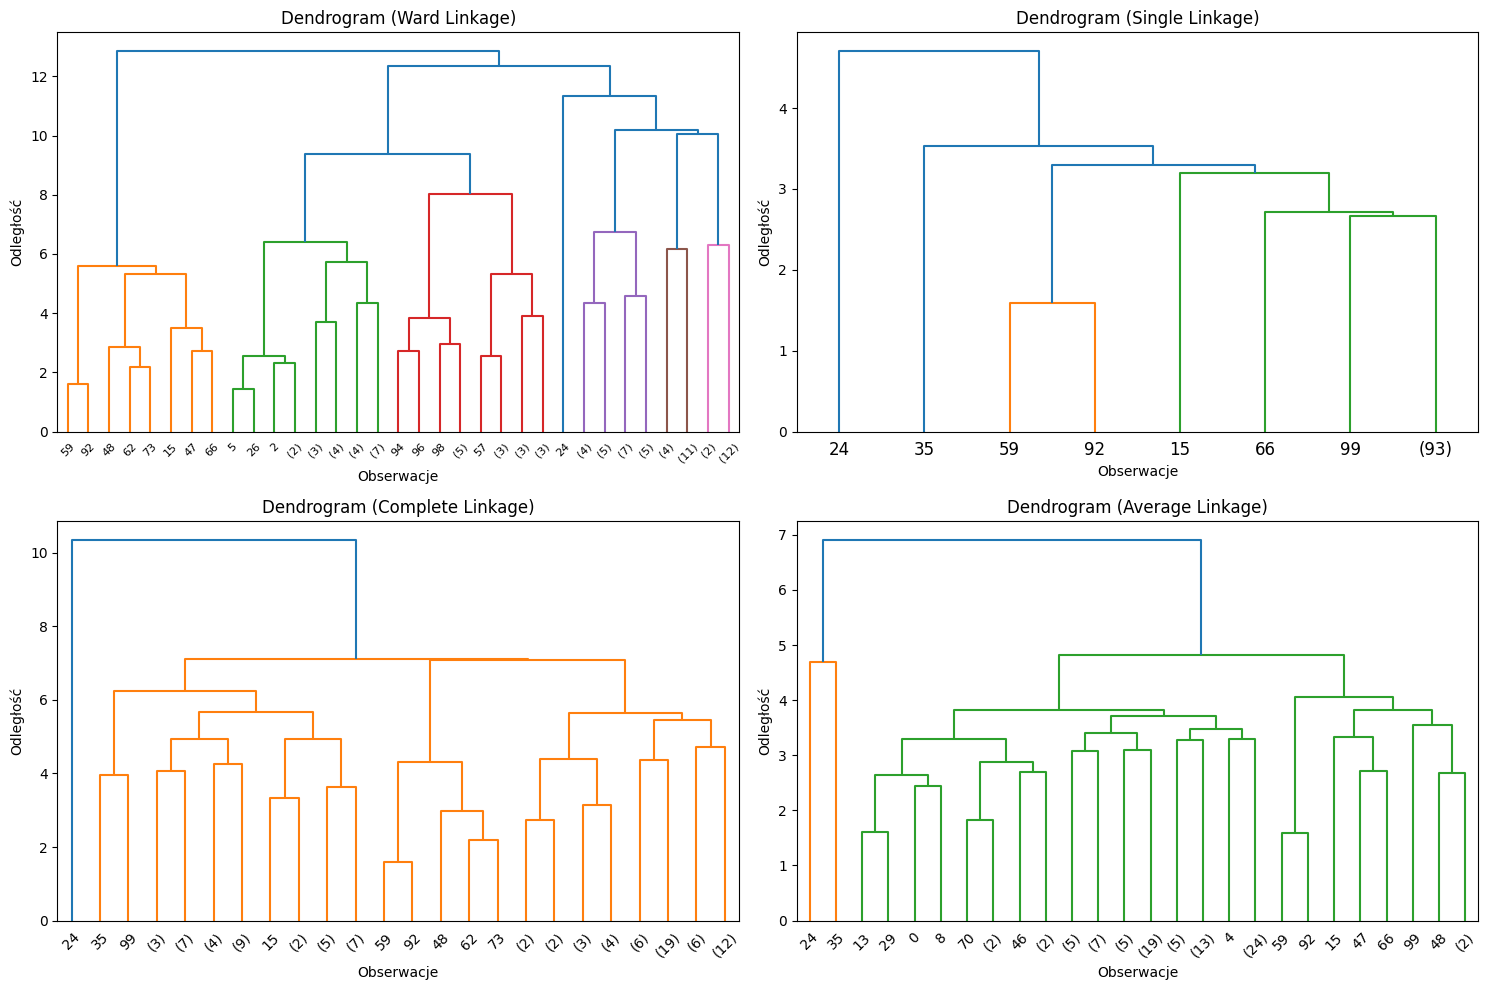

Silhouette Score dla klasteryzacji hierarchicznej (ward linkage, k=3): 0.11
Silhouette Score dla k-means (k=3): 0.12
Silhouette Score dla klasteryzacji hierarchicznej po PCA (k=3): 0.33


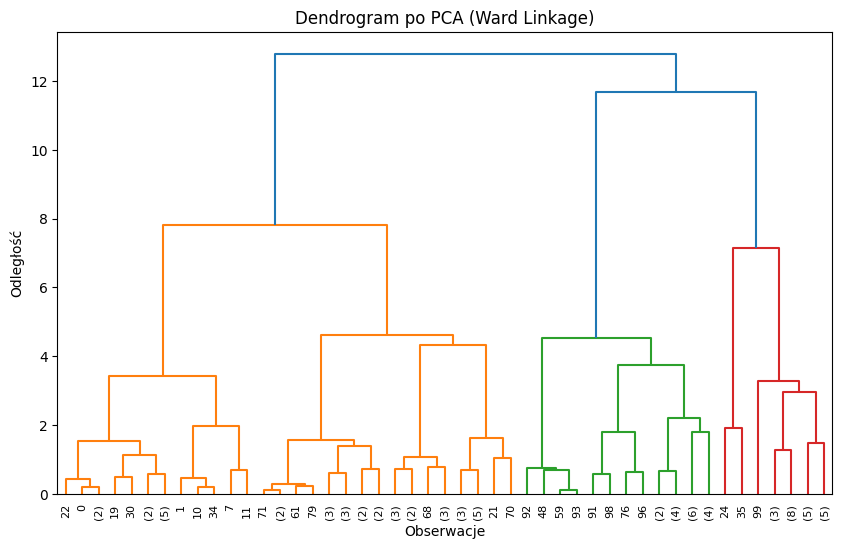

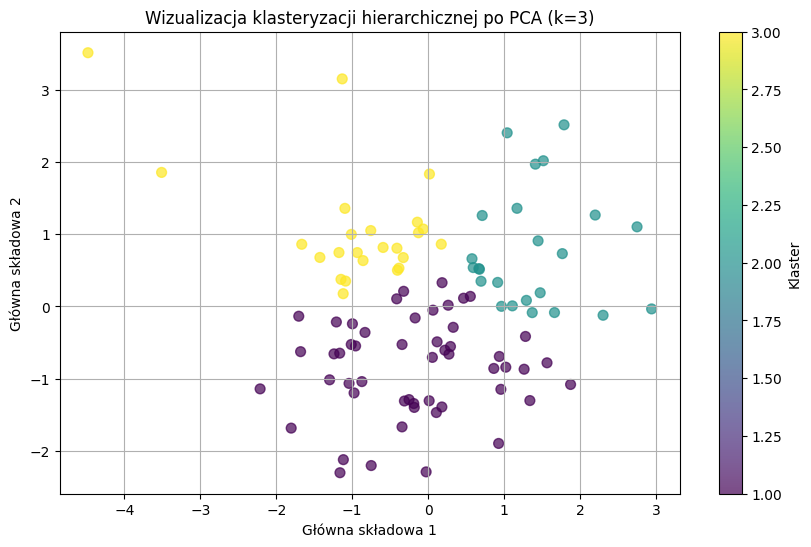

In [17]:
# 4. Metody hierarchiczne
# 4.1 Wykonaj klasteryzację hierarchiczną na dowolnym zbiorze danych. Przeanalizuj wpływ różnych metod łączenia (np. Ward, single linkage, complete linkage) na strukturę dendrogramu.
# 4.2 Wyodrębnij klastry na różnych poziomach dendrogramu. Porównaj otrzymane wyniki z klasteryzacją k-means.
# 4.3 Wykorzystaj dane wielowymiarowe i wykonaj redukcję wymiarowości (np. PCA) przed zastosowaniem klasteryzacji hierarchicznej.
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

methods = ['ward', 'single', 'complete', 'average'] # 4.1 Klasteryzacja z różnymi metodami łączenia

plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(data_scaled, method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.xlabel("Obserwacje")
    plt.ylabel("Odległość")
plt.tight_layout()
plt.show()

chosen_method = 'ward'  # 4.2 Wyodrębnianie klastrów na różnych poziomach dendrogramu (dla Ward)
Z = linkage(data_scaled, method=chosen_method)


k = 3 # Wyodrębnienie klastrów (trzech)
clusters_hierarchical = fcluster(Z, k, criterion='maxclust')

silhouette_hierarchical = silhouette_score(data_scaled, clusters_hierarchical) # Silhouette score dla klasteryzacji hierarchicznej
print(f"Silhouette Score dla klasteryzacji hierarchicznej ({chosen_method} linkage, k={k}): {silhouette_hierarchical:.2f}")

kmeans = KMeans(n_clusters=k, random_state=42) # Porównanie z kmeans
clusters_kmeans = kmeans.fit_predict(data_scaled)
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)

print(f"Silhouette Score dla k-means (k={k}): {silhouette_kmeans:.2f}")

pca = PCA(n_components=2) # 4.3 Redukcja wymiarowości (PCA) przed klasteryzacją hierarchiczną i klasteryzacja hierarchiczna po PCA
data_pca = pca.fit_transform(data_scaled)
Z_pca = linkage(data_pca, method=chosen_method)
clusters_hierarchical_pca = fcluster(Z_pca, k, criterion='maxclust')

silhouette_hierarchical_pca = silhouette_score(data_pca, clusters_hierarchical_pca) # Silhouette score po PCA
print(f"Silhouette Score dla klasteryzacji hierarchicznej po PCA (k={k}): {silhouette_hierarchical_pca:.2f}")

# Wizualizacja dendrogramu po PCA
plt.figure(figsize=(10, 6))
dendrogram(Z_pca, truncate_mode='level', p=5)
plt.title(f"Dendrogram po PCA ({chosen_method.capitalize()} Linkage)")
plt.xlabel("Obserwacje")
plt.ylabel("Odległość")
plt.show()

# Wizualizacja klasteryzacji w 2D po PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_hierarchical_pca, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Wizualizacja klasteryzacji hierarchicznej po PCA (k={k})")
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.colorbar(label="Klaster")
plt.grid()
plt.show()
